In [1]:
# 3.5 quantum k means cluster
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi
import matplotlib.pyplot as plt

In [2]:
def Distance(a,b):
    # SWAP test for distance
    # all vectors should be in the first quadrant
    nshots=10000 # number of shots
    
    # create the full circuit
    qr=QuantumRegister(3,'q')
    cr=ClassicalRegister(1,'c')

    circuit = QuantumCircuit(qr,cr)
    circuit.u(0.5*a[0],0.5*a[1],0.,[1])
    circuit.u(0.5*b[0],0.5*b[1],0.,[2])
    circuit.h(0)
    circuit.cswap(qr[0], qr[1], qr[2])
    circuit.h(0)

    circuit.measure(range(1),range(1))

    # result and city diagram 
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend, shots=nshots)
    result = job.result()
    counts = result.get_counts(circuit)

    # inner product
    try:
        pr0=counts['0']/nshots
    except:
        pr0=0.

    ab2=(2*pr0-1.)

    # distance
    return 2*(1-np.sqrt(ab2))


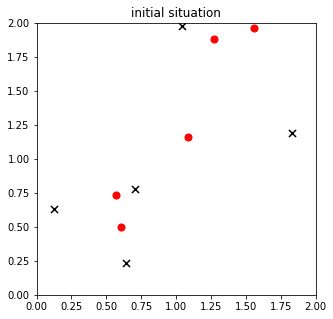

iteration= 1


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


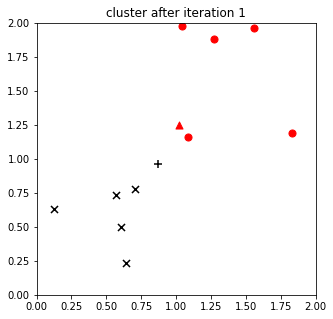

iteration= 2


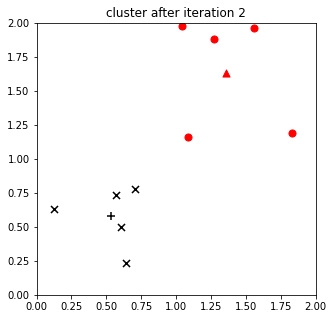

iteration= 3


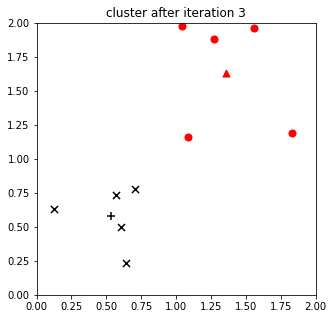

iteration= 4


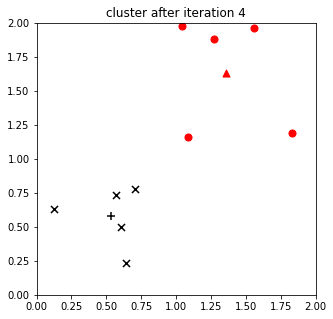

In [3]:
# K-means cluster

# generate some data
ndata=10

# make data
X=0.5*np.ones((ndata,2))
X[int(ndata/2):]=-X[int(ndata/2):]
X=X+1.0*(np.random.rand(ndata,2)-0.5)
X=X+np.ones((ndata,2))
np.random.shuffle(X)
#print(X)

# random initialize 2 means
C=[X[:int(ndata/2)],X[int(ndata/2):]]

# means
M=np.zeros((2,2))

# plot initial situation
x_min = 0.
x_max = 2.
y_min = 0.
y_max = 2.

plt.figure(figsize=(5,5))
plt.scatter(C[0][:, 0], C[0][:, 1], c='r', marker='o', s=50)
plt.scatter(C[1][:, 0], C[1][:, 1], c='k', marker='x', s=50)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('initial situation')
plt.show()

# iteration
for it in range(4):
    
    print('iteration=',it+1)

    # calculate means
    for i in range(2):
        M[i,:]=np.mean(C[i],axis=0)

    #update cluster
    C0=[]
    C1=[]
    for x in X:
        d0=Distance(x,M[0])
        d1=Distance(x,M[1])
        if (d0<d1):
            C0.append(x[:])
        else:
            C1.append(x[:])

    C=[np.array(C0),np.array(C1)]
    
    # plot the result
    plt.figure(figsize=(5,5))
    plt.scatter(M[0, 0], M[0, 1], c='r', marker='^', s=50)
    plt.scatter(M[1, 0], M[1, 1], c='k', marker='+', s=50)
    plt.scatter(C[0][:, 0], C[0][:, 1], c='r', marker='o', s=50)
    plt.scatter(C[1][:, 0], C[1][:, 1], c='k', marker='x', s=50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('cluster after iteration '+str(it+1))
    plt.show()
